In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install --upgrade geopandas
import geopandas
!pip install --upgrade mapclassify
import mapclassify

# Wine Reviews

Link to dataset: https://www.kaggle.com/datasets/zynicide/wine-reviews

> Note: Dataset from given link has been modified, because the first column was unammed which caused problems with pandas library. Also several country names were not compatible with geopandas.

## Basic statistics

In [2]:
data = pd.read_csv("winemag-data-130k-v2.csv")
data.head()

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,United States of America,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,United States of America,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,United States of America,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


This dataset contains information about wine reviews from all over the world. We can define country of origin, the vineyard where it comes from, province, region and the most important: given score and wine price.

In [3]:
print (data.columns)
wine_categorical_df = data[['id', 'country', 'description', 'designation', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery']]
wine_numerical_df = data[['points', 'price']]


Index(['id', 'country', 'description', 'designation', 'points', 'price',
       'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')


There are only two numerical variables.
- Wine rating
- Price for the bottle in dollars

In [4]:
wine_numerical_df.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


As we can see from `count` column, price data is incomplete. It is because not every bottle price is known and it was read by python as `NaN` (in IT this value means Not a Number)

The wine ratings was given by testers in scale from 1 to 100. However the minimum value of `points` is only 80. The conclusion is that only the best wines were included in dataset.

## Correlations

The simplest question is:
Are more expensive wines better?

Text(0, 0.5, 'Price')

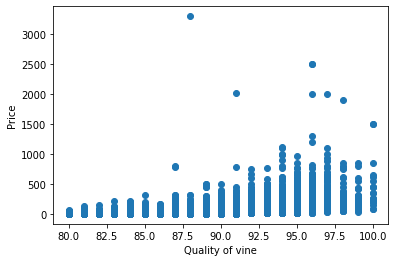

In [5]:
plt.scatter(data.points, data.price)
plt.xlabel("Quality of vine")
plt.ylabel("Price")

At first glance - yes, but we can use better plot to show this correlation.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


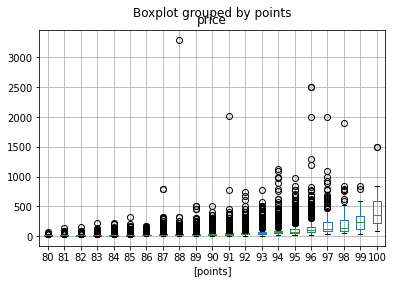

In [6]:
box_data = data[["points", "price"]]
box_data.boxplot (by="points")

Now we can see the correlation clearly. Excluding outliers the best wine tend to cost more.

## Wines on the world map

Let's see how average price and wine rating is distributed on world map.

In [7]:
data_by_country = data.copy()
data_by_country.columns = ['id', 'name', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery']
points_by_country = data_by_country.groupby("name")['points'].mean().to_frame()
price_by_country = data_by_country.groupby("name")['price'].mean().to_frame()

### Average wine rating on country map

In [8]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')

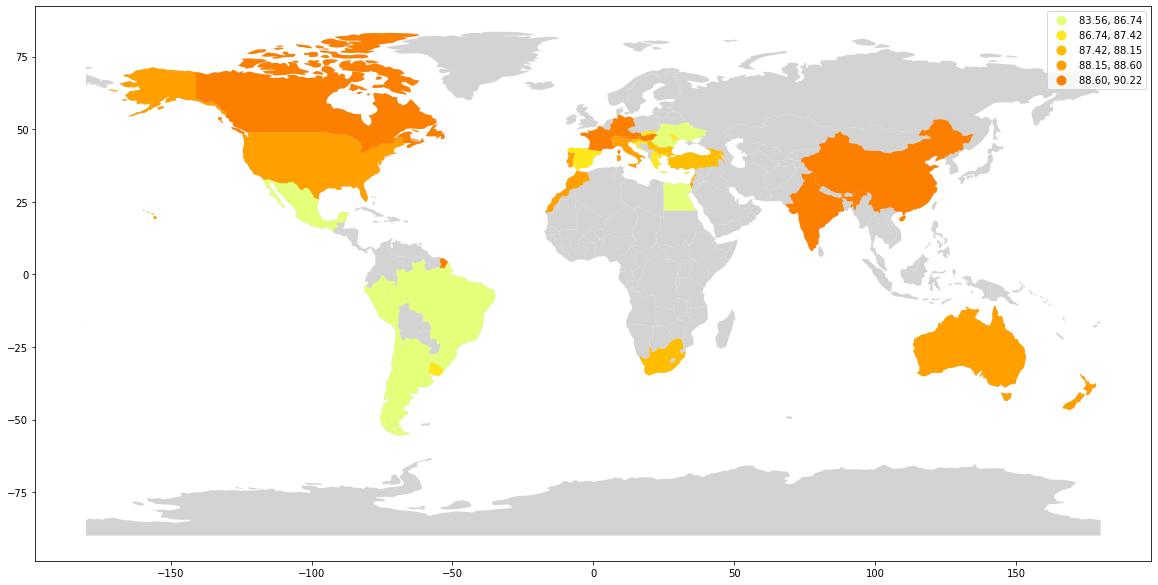

In [9]:
merge=pd.merge(world,points_by_country,on='name')

ax = world.plot(figsize=(20, 15), color='lightgray')
merge.plot(column='points', scheme="quantiles", figsize=(20, 15), legend=True, cmap='Wistia', ax=ax)

### Average bottle price (in dollars) on country map

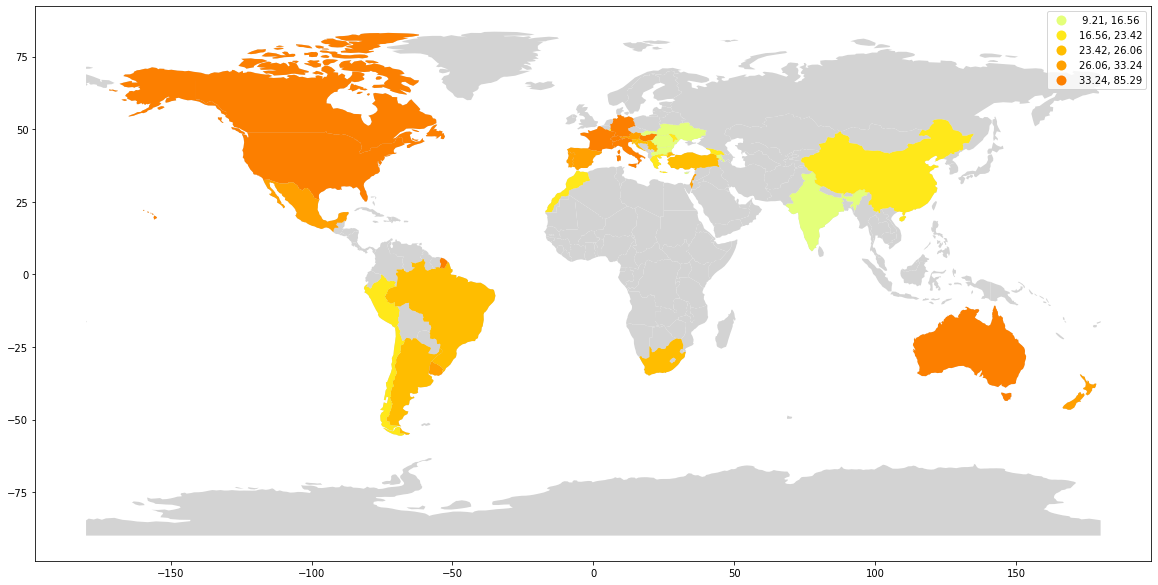

In [10]:
merge=pd.merge(world,price_by_country,on='name')

ax = world.plot(figsize=(20, 15), color='lightgray')
merge.plot(column='price', scheme="quantiles", figsize=(20, 15), legend=True, cmap='Wistia', ax=ax)

These two charts contain intriguing information.

The best quality vine come from Canada, France, Germany, Hungary, Austria, China and India.

Price goes with quality, but in China and India it is diffrent. These countries have average wine rating about 88-90 points, but have lowest average prices.

We see the opposite situation in South America. There are lower (but still very good) quality wines, but price is relatively high.

## Wine trivia

In [11]:
data.groupby("winery")['points'].mean().to_frame().sort_values('points', ascending=False)
data.loc [(data['winery'] == 'Araujo')][['winery', 'country', 'region_1', 'region_2']].head(1)

,winery,country,region_1,region_2
41837,Araujo,United States of America,Napa Valley,Napa


On average, top rated wine comes from winery Araujo located in Napa Valley, United States of America.

In [12]:
data.sort_values('price', ascending=False).head(1)

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
80290,80290,France,This ripe wine shows plenty of blackberry frui...,NaN,88,3300.0,Bordeaux,Médoc,NaN,Roger Voss,@vossroger,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet


The most expensive reviewed wine was Château les Ormes Sorbet 2013 Médoc from France, which it cost 3300$ per bottle. It received 88 out of 100 points.

In [13]:
tasters = {}

for index, row in data.iterrows() :
  tasters[row['taster_name']] = tasters.get (row['taster_name'], 0) + 1

tasters_sorted = sorted(tasters.items(), key=lambda item: item[1])
print (tasters_sorted[-1])
print (tasters_sorted[-2])

(nan, 26244)
('Roger Voss', 25514)


Majority of tasters names are not present in dataset. Second on the list is Roger Voss who gives over twenty five thousand of revievs!

In [14]:
data.loc [(data['points'] == 100)].sort_values('country', ascending=True)

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
345,345,Australia,This wine contains some material over 100 year...,Rare,100,350.0,Victoria,Rutherglen,NaN,Joe Czerwinski,@JoeCz,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat,Chambers Rosewood Vineyards
111756,111756,France,"A hugely powerful wine, full of dark, brooding...",NaN,100,359.0,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,Château Léoville Las Cases 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Las Cases
111755,111755,France,This is the finest Cheval Blanc for many years...,NaN,100,1500.0,Bordeaux,Saint-Émilion,NaN,Roger Voss,@vossroger,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend,Château Cheval Blanc
111753,111753,France,"Almost black in color, this stunning wine is g...",NaN,100,1500.0,Bordeaux,Pauillac,NaN,Roger Voss,@vossroger,Château Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend,Château Lafite Rothschild
122935,122935,France,"Full of ripe fruit, opulent and concentrated, ...",NaN,100,848.0,Bordeaux,Pessac-Léognan,NaN,Roger Voss,@vossroger,Château Haut-Brion 2014 Pessac-Léognan,Bordeaux-style White Blend,Château Haut-Brion
89728,89728,France,This latest incarnation of the famous brand is...,Cristal Vintage Brut,100,250.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Louis Roederer 2008 Cristal Vintage Brut (Cha...,Champagne Blend,Louis Roederer
58352,58352,France,"This is a magnificently solid wine, initially ...",NaN,100,150.0,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,Château Léoville Barton 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Barton
89729,89729,France,This new release from a great vintage for Char...,Le Mesnil Blanc de Blancs Brut,100,617.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,Salon
36528,36528,France,This is a fabulous wine from the greatest Cham...,Brut,100,259.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Krug 2002 Brut (Champagne),Champagne Blend,Krug
45781,45781,Italy,"This gorgeous, fragrant wine opens with classi...",Riserva,100,550.0,Tuscany,Brunello di Montalcino,NaN,Kerin O’Keefe,@kerinokeefe,Biondi Santi 2010 Riserva (Brunello di Montal...,Sangiovese,Biondi Santi


Nineteen wines from dataset got maxsimum score of one hundred points. Eight among them comes from France.